In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'wd':[]}

In [4]:
lr = 5.0e-5
weight_decay = [0.1, 0.01]

for wd in weight_decay:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, weight decay {wd}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=wd,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       accumulation_steps=2,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search roberta-large, learning rate 5e-05, weight decay 0.1


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5171	Val Loss:	0.8908	Accuracy:	0.6303	F1:	0.5890
2 / 30: Train Loss:	0.3839	Val Loss:	0.6681	Accuracy:	0.7899	F1:	0.7846
3 / 30: Train Loss:	0.2276	Val Loss:	0.6866	Accuracy:	0.7815	F1:	0.7777
4 / 30: Train Loss:	0.1573	Val Loss:	0.6621	Accuracy:	0.8067	F1:	0.8055
5 / 30: Train Loss:	0.0848	Val Loss:	0.6704	Accuracy:	0.7899	F1:	0.7833
6 / 30: Train Loss:	0.0235	Val Loss:	0.7042	Accuracy:	0.8067	F1:	0.8034
7 / 30: Train Loss:	0.0263	Val Loss:	1.0435	Accuracy:	0.7983	F1:	0.7988
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.77      0.79      0.78        38
oversimplification       0.93      0.72      0.81        36
slothful induction       0.77      0.89      0.82        45

          accuracy                           0.81       119
         macro avg       0.82      0.80      0.81       119
      weighted avg       0.82      0.81      0

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5123	Val Loss:	0.7271	Accuracy:	0.6639	F1:	0.6378
2 / 30: Train Loss:	0.3601	Val Loss:	0.6945	Accuracy:	0.7899	F1:	0.7859
3 / 30: Train Loss:	0.2213	Val Loss:	0.7055	Accuracy:	0.7899	F1:	0.7851
4 / 30: Train Loss:	0.0991	Val Loss:	0.9869	Accuracy:	0.7647	F1:	0.7612
5 / 30: Train Loss:	0.1378	Val Loss:	0.6079	Accuracy:	0.8235	F1:	0.8211
6 / 30: Train Loss:	0.0684	Val Loss:	0.8490	Accuracy:	0.7983	F1:	0.7883
7 / 30: Train Loss:	0.0281	Val Loss:	0.8736	Accuracy:	0.8067	F1:	0.8024
8 / 30: Train Loss:	0.0265	Val Loss:	1.0297	Accuracy:	0.7899	F1:	0.7856
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.79      0.79      0.79        38
oversimplification       0.96      0.72      0.83        36
slothful induction       0.78      0.93      0.85        45

          accuracy                           0.82       119
         macro avg       0.84     

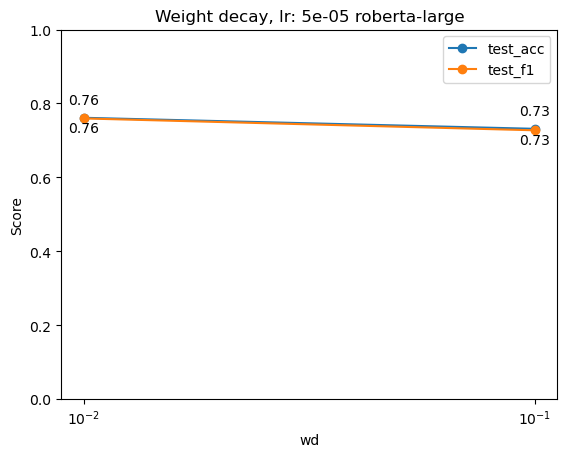

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Weight decay, lr: {lr} {model_checkpoint}',
                        column='wd',
                        sci_format=True)

In [6]:
%reset -f